# Question 1A

## Import Packages

In [21]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset
import torch
import random
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Specify Transforms

In [3]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(scale=(0.6, 1.0), size=(112,112)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

eval_transforms = transforms.Compose([
    transforms.Resize(size=(112,112)),
    transforms.ToTensor()
])



## Load in Dataset

Code is initally loaded using the ImageFolder Class, which replaces the dataset class. This class requires the root folder (In this case the seg_train folder and creates classes based on the name of the folder. The transforms can also be applied here. Current transforms are from lab 4

In [24]:
train_dataset = ImageFolder(root='datasets/Intel_Classification_Dataset/seg_train',transform=train_transforms)
print("Train: {} examples".format(len(train_dataset)))

eval_dataset= ImageFolder(root='datasets/Intel_Classification_Dataset/seg_test',transform=eval_transforms)
print("Eval: {} examples".format(len(eval_dataset)))



Train: 14034 examples
Eval: 3000 examples


Once passed into the class, the dataset can be passed using the dataloader class like previous. Current batch size is from lab 4

In [25]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
eval_loader=torch.utils.data.DataLoader(dataset=eval_dataset, batch_size=len(eval_dataset), shuffle=True)
print("Train: {} batches".format(len(train_loader)))
print("Valid: {} batches".format(len(eval_loader))) 

Train: 220 batches
Valid: 1 batches


## Show 10 random Images to verify labels

Code gets the class names randomly picks 10 images to display. Code credit ChatGPT

### Training Dataset

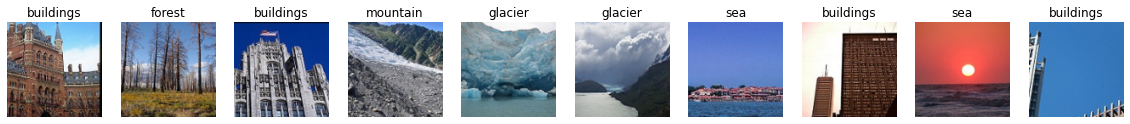

In [26]:
# Get the class names
class_names = train_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(train_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = train_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()


### Eval Dataset

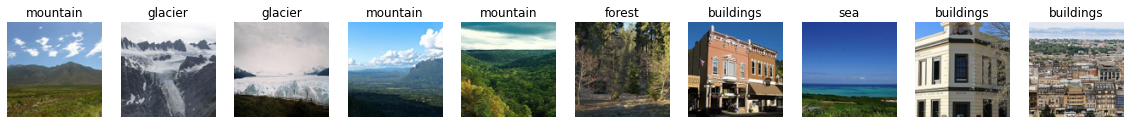

In [27]:
# Get the class names
class_names = eval_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(eval_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = eval_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()
